In [26]:
import pandas as pd
data=pd.read_excel("C:/Users/raghu/Downloads/behavioural.csv.xlsx")
data=data.iloc[:, 1:9]
data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [27]:
data.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [29]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'EV_Price'},inplace=True)
data.rename(columns={'Total Salary':'Total_Salary'},inplace=True)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total_Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


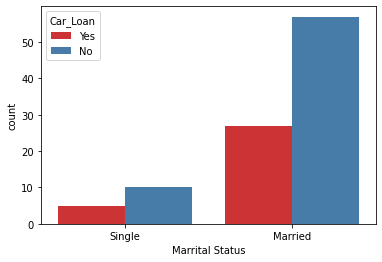

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = data, palette = 'Set1')
plt.show()

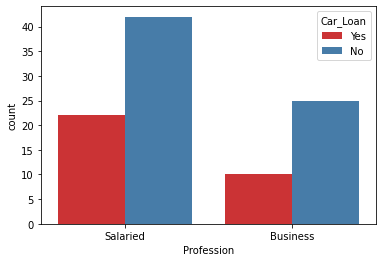

In [31]:
sns.countplot(x ='Profession', hue = 'Car_Loan',  data = data, palette = 'Set1')
plt.show()

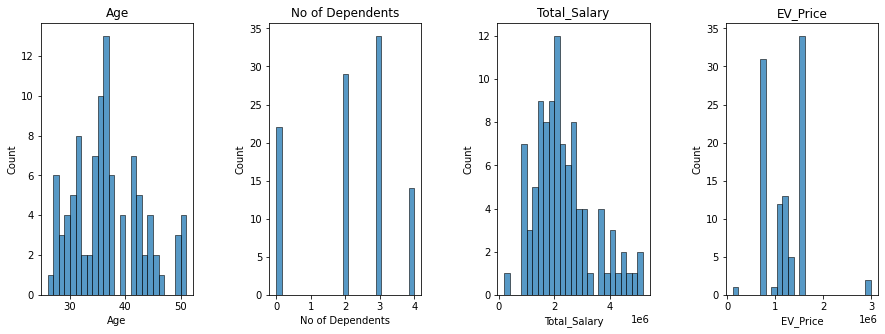

In [33]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total_Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [34]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Defaulting to user installation because normal site-packages is not writeable


In [35]:
data_demo = data[list(data.columns)].values


In [36]:
data_demo[:, 0] = data_demo[:, 0].astype(float)
data_demo[:, 4] = data_demo[:, 4].astype(float)
data_demo[:, 6] = data_demo[:, 6].astype(float)
data_demo[:, 7] = data_demo[:, 7].astype(float)

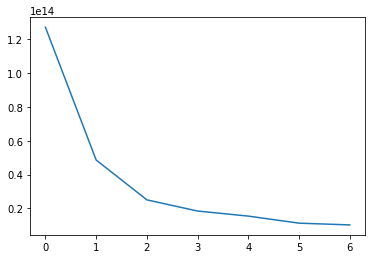

In [37]:
pred_price = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(data_demo, categorical=[1,2,3,5])
    pred_price.append(kproto.cost_)

plt.plot(pred_price)

In [38]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(data_demo, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 22, ncost: 56696304528454.45
Run: 1, iteration: 2/20, moves: 16, ncost: 50057040964014.66
Run: 1, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 26, ncost: 59534589041758.66
Run: 2, iteration: 2/20, moves: 18, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 11, ncost: 50057040964014.66
Run: 3, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 

In [39]:
data['Cluster'] = clusters

In [40]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total_Salary,EV_Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,1
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,1
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,0


In [42]:
print(data.Total_Salary.mean(),data.EV_Price.mean())
print(data.Total_Salary[data.Cluster==0].mean(),data.EV_Price[data.Cluster==0].mean())
print(data.Total_Salary[data.Cluster==1].mean(),data.EV_Price[data.Cluster==1].mean())

2270707.0707070706 1194040.4040404041
3617857.1428571427 1632142.857142857
1739436.61971831 1021267.6056338028


In [43]:
Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]
     

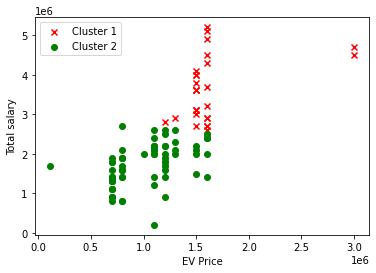

In [45]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total_Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total_Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

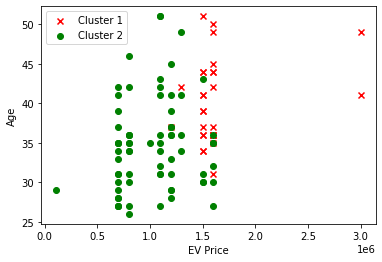

In [46]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

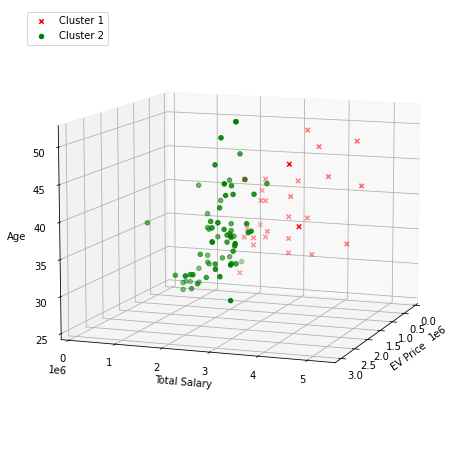

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total_Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total_Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()